<a href="https://colab.research.google.com/github/abbasKareem/SNR/blob/master/snr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import math
from scipy.stats import norm
import scipy.io
from scipy import linalg

np.random.seed(42)



In [2]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
Ns=1000

SNR =np.array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0], dtype='int64')
snr = np.array([0.0100, 0.0126, 0.0158, 0.0200, 0.0251, 0.0316, 0.0398,  0.0501, 0.0631, 0.0794, 0.1000, 0.1259, 0.1585, 0.1995,  0.2512, 0.3162, 0.3981, 0.5012 ,0.6310, 0.7943, 1.0000], dtype='float64')
L=3
nn=0
m=0
pf=0.01
num_iter=100
l=1
test = 0
pd = np.zeros(21)
# for x in (n+1 for n in range(5)):
for i in SNR:
  count = 0
  conf = 0
  for h in (n+1 for n in range(num_iter)):
    d = np.array([1, 0, 1, 1, 0]) # Data sequence
    b = (2 * d) - 1 # Convert unipolar to bipolar
    T = 1 # Bit duration
    Eb = T/2 # This will result in unit amplitude waveforms
    fc = 7/T # Carrier frequency
    t = np.linspace(0, 5, Ns) # discrete time sequence between 0 and 5*T (1000 samples)
    N = len(t) # Number of samples
    Nsb = N/len(d) # Number of samples per bit
    dd = np.tile(d.conj().T, (1, int(Nsb))) # replicate each bit Nsb times
    bb = np.tile(b.conj().T,(1, int(Nsb)))  # Transpose the rows and columns
    dw = dd.conj().transpose()
    dw = np.concatenate([dw.flat]) # Convert dw to a column vector (colum by column) and convert to a row vector
    bw = bb.conj().T # line 32
    bw = np.concatenate([bw.flat]) # Data sequence samples line 33  
    w = np.dot(np.sqrt((np.dot(2,Eb))/T), np.cos(np.dot(np.dot(np.dot(2, math.pi), fc), t))) # carrier waveform line 34
    bpsk_w = bw*w # modulated waveform line 35
    signal = bpsk_w # line 36
    noise = np.random.standard_normal((Ns,)) # line 37
    noise_power= (np.linalg.norm(noise)) ** 2 # line 38
    signal_power = (np.linalg.norm(signal)) ** 2 # line 39
    # mult = sqrt(snr(i)*noise_power/signal_power) # line 40
    mult =np.sqrt(((signaltonoise(np.array([i]))) * noise_power) / signal_power) # line 40
    signal1 =np.dot(mult, signal) # line 41
    signal2 = signal1 + noise # line 42
    k = 0 # line 43
    Cx = np.zeros((1, L)) # line 44
    for n in range(L - 1): # line 45
      for j in range(1, (Ns-L-1), 1): # line 46
        Cx[:, n] = Cx[:, n] + (signal2[j] * signal2[j+k]) # line 47
      k = k +1 # line 49
    nvar = noise.var(axis=0) # line 51
    svar = signal.var(axis=0) # line 52
    sn = svar / nvar #line 53
    Cx = Cx / Ns # line 54
    Cx_mtx = linalg.toeplitz(Cx) # line 55
    T2 = np.sum(np.diag(np.abs(Cx_mtx))) # line 56
    T1 = np.sum(np.sum(np.abs(Cx_mtx))) # line 57
    y=T1 / T2 #line 58
    nu = 1.585 #line 59
    Rl = (T1 - T2) / (sn*nvar*nu) # line 60
    a0 = (Rl*sn) / (sn+1) # line 61
    a1 = np.sqrt(2 / (Ns * math.pi)) # line 62
    a2 = L - 1  # line 63
    a = (a2 * a1) - a0 # line 64
    b = ((a2 * a1) - a0) + 2 # line 65
    c0 = (1 - pf) / pf # line 66
    c1=4/Ns # line 67
    c2 = 1 + (a2*a1) # line 68
    c3 = a0 + 1 # line 69
    Aa = np.log(c0 * (c2 / c3)) # line 70
    A = Aa * c1 #line 71
    t1 = 1 + ((A*b)/a) # line 72
    th1 = (a/A)*(-1 +np.sqrt(t1)) # line 73
    R2 = (T1 - T2) /((sn/(nvar*nu))) # line 74
    aa0 = (R2 * sn) / (sn + 1) # line 75
    aa = (a2 * a1) -aa0 # line 76
    bb = (a2 * a1) -aa0 + 2 # line 77
    cc3 = aa0 + 1 # line 78
    Aaa =np.log(c0*(c2/cc3)) # line 79
    AA = Aaa * c1  # line 80
    t2 = 1 + ((AA * bb) / aa) # line 81
    th2 = (aa / AA) * (-1 + np.sqrt(t2)) # line 82
    Rl1 = (T1 - T2) / (sn * nvar) # line 83
    a00 = (Rl1 * sn) / (sn + 1) # line 84
    aa0 = (a2 * a1) - a00 # line 85
    bb0 = (a2 * a1) - a00 + 2 # line 86
    c33 = a00 + 1 # line 87
    Aa0 = np.log(c0 * (c2 / c33)) # line 88
    AA0 = Aa0 * c1 # line 89
    t10 = 1 + ( (AA0 * bb0) / aa0) # line 90
    th = (aa0 / AA0) * (-1 + np.sqrt(t10)) # line 91
    D = ( th1 - th2 ) / 8 # line 92
    A=D+th2 # line 93
    B = A + D # line 94
    C = B + D # line 95
    E = C + D # line 96
    F = E + D # line 97
    G = F + D # line 98
    H = G + D # line 99
    if y >= th1: #line 100 #if the ratio is larger than the threshold then there is a detection
      m = 1 # line 101
    elif y <= th2: # line 102
      m = 0 # line 103
    if H < y < th1:
      nn = 7
    elif G < y <= H:
      nn = 6
    elif F < y <=G:
      nn = 5
    elif E < y <=F:
      nn = 4
    elif C < y <=E:
      nn = 3
    elif B < y <=C:
      nn = 2
    elif A < y <=B:
      nn = 1
    elif th2 < y <=A:
      nn = 0
    Y = nn + m
    if Y >= th:
      count = count + 1
  pd[i] = count / num_iter




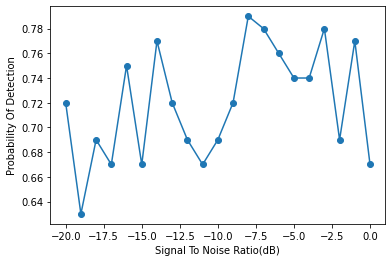

In [23]:

plt.plot(SNR, pd, marker='o')
plt.xlabel("Signal To Noise Ratio(dB)")
plt.ylabel("Probability Of Detection")
plt.show()
